# 查看数据

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_excel('titanic3.xls')

In [3]:
df[:3]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


##### 去除与survived无关的变量(eg.ticket,cabin)

In [4]:
cols=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked']
last_df=df[cols]

In [5]:
last_df[:2]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S


# 数据预处理

In [6]:
#先drop掉name,目前还用不到
last_df=last_df.drop(['name'],axis=1)

In [7]:
last_df[:2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S


In [8]:
last_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.381971,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.486055,0.837836,14.413500,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
last_df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [10]:
#接下来将age,fare里面的NULL全部用平均值来代替
age_mean=last_df['age'].mean()
last_df['age']=last_df['age'].fillna(age_mean)
fare_mean=last_df['fare'].mean()
last_df['fare']=last_df['fare'].fillna(fare_mean)

In [11]:
#最后一个问题将sex变为数值型变量，便于分类，使用map函数方便快捷
last_df['sex']=last_df['sex'].map({'female':0,'male':1})

In [12]:
last_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.000000,0,0,211.3375,S
1,1,1,1,0.916700,1,2,151.5500,S
2,0,1,0,2.000000,1,2,151.5500,S
3,0,1,1,30.000000,1,2,151.5500,S
4,0,1,0,25.000000,1,2,151.5500,S
5,1,1,1,48.000000,0,0,26.5500,S
6,1,1,0,63.000000,1,0,77.9583,S
7,0,1,1,39.000000,0,0,0.0000,S
8,1,1,0,53.000000,2,0,51.4792,S
9,0,1,1,71.000000,0,0,49.5042,C


In [13]:
#对登船港口进行一位有效位编码
last2_df=pd.get_dummies(data=last_df,columns=['embarked'])#这个方法真的很人性化

In [14]:
last2_df[:2]#查看预处理后的结果

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,1,0.9167,1,2,151.5500,0,0,1


# DF转换为array

In [15]:
array=last2_df.values

In [16]:
array.shape

(1309, 10)

In [17]:
array[:1]

array([[  1.    ,   1.    ,   0.    ,  29.    ,   0.    ,   0.    ,
        211.3375,   0.    ,   0.    ,   1.    ]])

##### 第一个字段为label,后面的特征全部可以定义为feature

In [18]:
label=array[:,0]#可以说这是一个二维的向量，只需要每一行的第一列即可
feature=array[:,1:]

In [19]:
label

array([1., 1., 0., ..., 0., 0., 0.])

In [20]:
feature

array([[ 1.    ,  0.    , 29.    , ...,  0.    ,  0.    ,  1.    ],
       [ 1.    ,  1.    ,  0.9167, ...,  0.    ,  0.    ,  1.    ],
       [ 1.    ,  0.    ,  2.    , ...,  0.    ,  0.    ,  1.    ],
       ...,
       [ 3.    ,  1.    , 26.5   , ...,  1.    ,  0.    ,  0.    ],
       [ 3.    ,  1.    , 27.    , ...,  1.    ,  0.    ,  0.    ],
       [ 3.    ,  1.    , 29.    , ...,  0.    ,  0.    ,  1.    ]])

> 这里有个问题年龄，运费fare，sex之间的数值差异十分大

# 特征字段进行标准化

In [21]:
from sklearn import preprocessing#sklearn的processing模块有具体介绍
scale=preprocessing.MinMaxScaler(feature_range=(0,1))
last_feature=scale.fit_transform(feature)

In [22]:
last_feature

array([[0.        , 0.        , 0.36116884, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.00939458, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.0229641 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.32985358, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.33611663, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.36116884, ..., 0.        , 0.        ,
        1.        ]])

> 金星：完美~·~

# 将数据分为train和test两部分

In [23]:
cols=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked']
_df=df[cols]
msk=np.random.rand(len(_df))<0.8
train=_df[msk]
test=_df[~msk]

In [24]:
len(train)

1071

In [25]:
len(test)

238

In [26]:
len(df)

1309

In [27]:
len(df)==len(train)+len(test)

True

##### 将上面预处理数据的过程写成一个完整的函数

In [28]:
from sklearn import preprocessing
def preprocess(df):
    df=df.drop(['name'],axis=1)
    age_mean=df['age'].mean()
    df['age']=df['age'].fillna(age_mean)
    fare_mean=df['fare'].mean()
    df['fare']=df['fare'].fillna(fare_mean)
    df['sex']=df['sex'].map({'female':0,'male':1})
    df=pd.get_dummies(data=df,columns=['embarked'])
    array=df.values
    Label=array[:,0]
    feature=array[:,1:]
    scale=preprocessing.MinMaxScaler(feature_range=(0,1))
    Feature=scale.fit_transform(feature)
    return Feature,Label

In [29]:
train_feature,train_label=preprocess(train)
test_feature,test_label=preprocess(test)

In [30]:
train_feature

array([[0.        , 1.        , 0.01015802, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.02483026, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.40406294, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.39950884, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.35665885, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.39051891, ..., 0.        , 0.        ,
        1.        ]])

In [31]:
train_label

array([1., 0., 0., ..., 0., 0., 0.])

# 建立多层感知机模型

In [32]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

C:\Users\admin\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [33]:
model=Sequential()

##### 建立隐藏层1

In [34]:
model.add(Dense(units=40,input_dim=9,#设置40个神经元
                kernel_initializer='uniform',#使用uniform分布的随机数，初始化权重和bias
               activation='relu'))

##### 建立隐藏层2

In [35]:
model.add(Dense(units=30,kernel_initializer='uniform',
               activation='relu'))

##### 建立输出层

In [36]:
model.add(Dense(units=1,kernel_initializer='uniform',#输出层一个神经元
               activation='sigmoid'))

# 开始训练

In [37]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',metrics=['accuracy'])

In [38]:
train_history=model.fit(train_feature,train_label,validation_split=0.1,
                  epochs=30,
                  batch_size=30,
                  verbose=2)

Train on 963 samples, validate on 108 samples
Epoch 1/30
 - 1s - loss: 0.6886 - acc: 0.5971 - val_loss: 0.6607 - val_acc: 0.7963
Epoch 2/30
 - 0s - loss: 0.6632 - acc: 0.6199 - val_loss: 0.5776 - val_acc: 0.7963
Epoch 3/30
 - 0s - loss: 0.6057 - acc: 0.6615 - val_loss: 0.4881 - val_acc: 0.8148
Epoch 4/30
 - 0s - loss: 0.5522 - acc: 0.7549 - val_loss: 0.4740 - val_acc: 0.7685
Epoch 5/30
 - 0s - loss: 0.5153 - acc: 0.7695 - val_loss: 0.4613 - val_acc: 0.7778
Epoch 6/30
 - 0s - loss: 0.5006 - acc: 0.7726 - val_loss: 0.4621 - val_acc: 0.7778
Epoch 7/30
 - 0s - loss: 0.4930 - acc: 0.7726 - val_loss: 0.4668 - val_acc: 0.7778
Epoch 8/30
 - 0s - loss: 0.4873 - acc: 0.7705 - val_loss: 0.4570 - val_acc: 0.7778
Epoch 9/30
 - 0s - loss: 0.4816 - acc: 0.7767 - val_loss: 0.4726 - val_acc: 0.7778
Epoch 10/30
 - 0s - loss: 0.4805 - acc: 0.7757 - val_loss: 0.4551 - val_acc: 0.7778
Epoch 11/30
 - 0s - loss: 0.4751 - acc: 0.7767 - val_loss: 0.4482 - val_acc: 0.7778
Epoch 12/30
 - 0s - loss: 0.4728 - acc:

# 可视化

In [39]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):#输入参数分别为，train_history,
                                                        #训练数据的执行结果，验证数据的执行结果
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

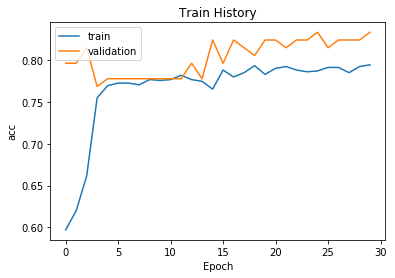

In [40]:
show_train_history(train_history,'acc','val_acc')

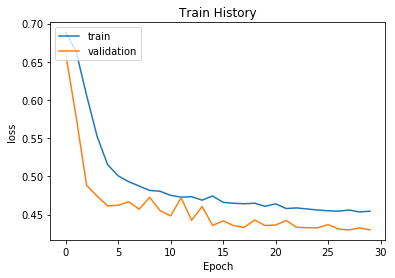

In [41]:
show_train_history(train_history,'loss','val_loss')

# 评估模型准确率

In [42]:
scores =model.evaluate(test_feature,test_label)

238/238 [==============================] - 0s 67us/step


In [43]:
scores[1]

0.8319327736101231

# 做一个有趣的实验
> 模拟出Jack和Rose两个电影人物，比较他们的生存率

##### 创建数据

In [44]:
Jack=pd.Series([0,'Jack',3,'male',23,1,0,5.000,'S'])
Rose=pd.Series([1,'Rose',1,'female',20,1,0,100.0000,'S'])
new_df=pd.DataFrame([list(Jack),list(Rose)],
                   columns=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked'])

##### 加入数据到DF中

In [45]:
df=pd.concat([_df,new_df],sort=False)

In [46]:
df[-4:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
1307,0,"Zakarian, Mr. Ortin",3,male,27.0,0,0,7.225,C
1308,0,"Zimmerman, Mr. Leo",3,male,29.0,0,0,7.875,S
0,0,Jack,3,male,23.0,1,0,5.000,S
1,1,Rose,1,female,20.0,1,0,100.000,S


# 进行预测

In [47]:
Feature,Label=preprocess(df)

In [48]:
probability=model.predict(Feature)

In [49]:
probability[:10]

array([[0.9776822 ],
       [0.54482657],
       [0.9709371 ],
       [0.36197898],
       [0.969016  ],
       [0.2566388 ],
       [0.9287646 ],
       [0.2852625 ],
       [0.9162269 ],
       [0.27310023]], dtype=float32)

In [50]:
pd=df
pd.insert(len(df.columns),'probability',probability)

In [51]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.132897
1,1,Rose,1,female,20.0,1,0,100.0,S,0.964962


> 可以看出Rose的存活率的确远远大于Jack,滑稽xiao

- 看看生存概率大于90%却仍然挂了的数据

In [54]:
pd[(pd['survived']==0)& (pd['probability']>0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.970937
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.969016
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.970464
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.967463
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.959756
